# Bookstore Analytics - Data Visualization
## Analysis of Cleaned Books Data

This notebook provides comprehensive visualizations of the bookstore dataset including price analysis, category distribution, ratings, and inventory insights.


In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure display settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set figure size default
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


## 1. Data Loading and Overview


In [23]:
# Load the cleaned data
df = pd.read_csv('src/cleaner/data/clean/books_clean_20251201.csv')

# Display basic information
print(f"Dataset Shape: {df.shape}")
print(f"\nTotal Books: {len(df)}")
print(f"\nColumns: {', '.join(df.columns)}")


Dataset Shape: (1000, 12)

Total Books: 1000

Columns: title, category, price_gbp, price_usd, price_category_usd, rating, availability, in_stock, stock_quantity, upc, product_page_url, description


In [24]:
# Display first few rows
df.head()


,title,category,price_gbp,price_usd,price_category_usd,rating,availability,in_stock,stock_quantity,upc,product_page_url,description
0,A Light in the Attic,Poetry,51.77,68.50,Luxury,3,In stock (22 available),True,22,a897fe39b1053632,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,Historical Fiction,53.74,71.10,Luxury,1,In stock (20 available),True,20,90fa61229261140a,https://books.toscrape.com/catalogue/tipping-t...,"""Erotic and absorbing...Written with starling ..."
2,Soumission,Fiction,50.10,66.29,Luxury,1,In stock (20 available),True,20,6957f44c3847a760,https://books.toscrape.com/catalogue/soumissio...,"Dans une France assez proche de la nôtre, un h..."
3,Sharp Objects,Mystery,47.82,63.27,Premium,4,In stock (20 available),True,20,e00eb4fd7b871a48,https://books.toscrape.com/catalogue/sharp-obj...,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,History,54.23,71.75,Luxury,5,In stock (20 available),True,20,4165285e1663650f,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...


In [25]:
# Statistical summary
df.describe()


,price_gbp,price_usd,rating,stock_quantity
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,35.07035,46.402580,2.923000,8.585000
std,14.44669,19.114733,1.434967,5.654622
min,10.00000,13.230000,1.000000,1.000000
25%,22.10750,29.247500,2.000000,3.000000
50%,35.98000,47.605000,3.000000,7.000000
75%,47.45750,62.792500,4.000000,14.000000
max,59.99000,79.370000,5.000000,22.000000


## 2. Price Analysis


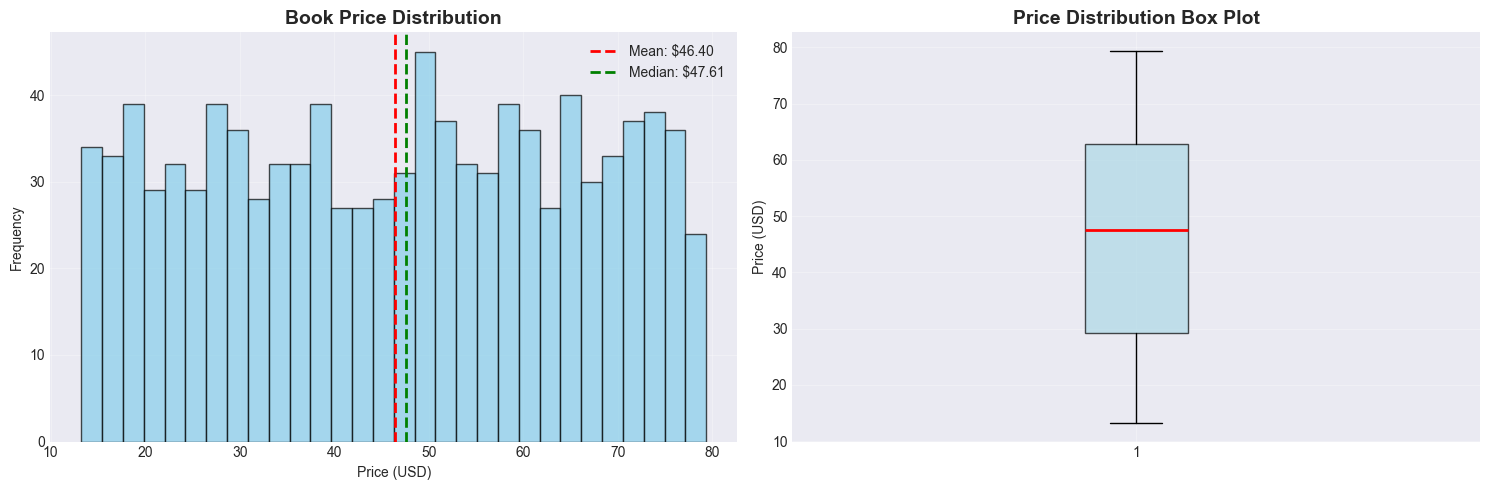

Price Statistics:
  Min Price: $13.23
  Max Price: $79.37
  Mean Price: $46.40
  Median Price: $47.61
  Std Dev: $19.11


In [26]:
# Price Distribution (USD)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['price_usd'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['price_usd'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["price_usd"].mean():.2f}')
axes[0].axvline(df['price_usd'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["price_usd"].median():.2f}')
axes[0].set_xlabel('Price (USD)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Book Price Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['price_usd'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Price (USD)')
axes[1].set_title('Price Distribution Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"  Min Price: ${df['price_usd'].min():.2f}")
print(f"  Max Price: ${df['price_usd'].max():.2f}")
print(f"  Mean Price: ${df['price_usd'].mean():.2f}")
print(f"  Median Price: ${df['price_usd'].median():.2f}")
print(f"  Std Dev: ${df['price_usd'].std():.2f}")


## 3. Category Analysis


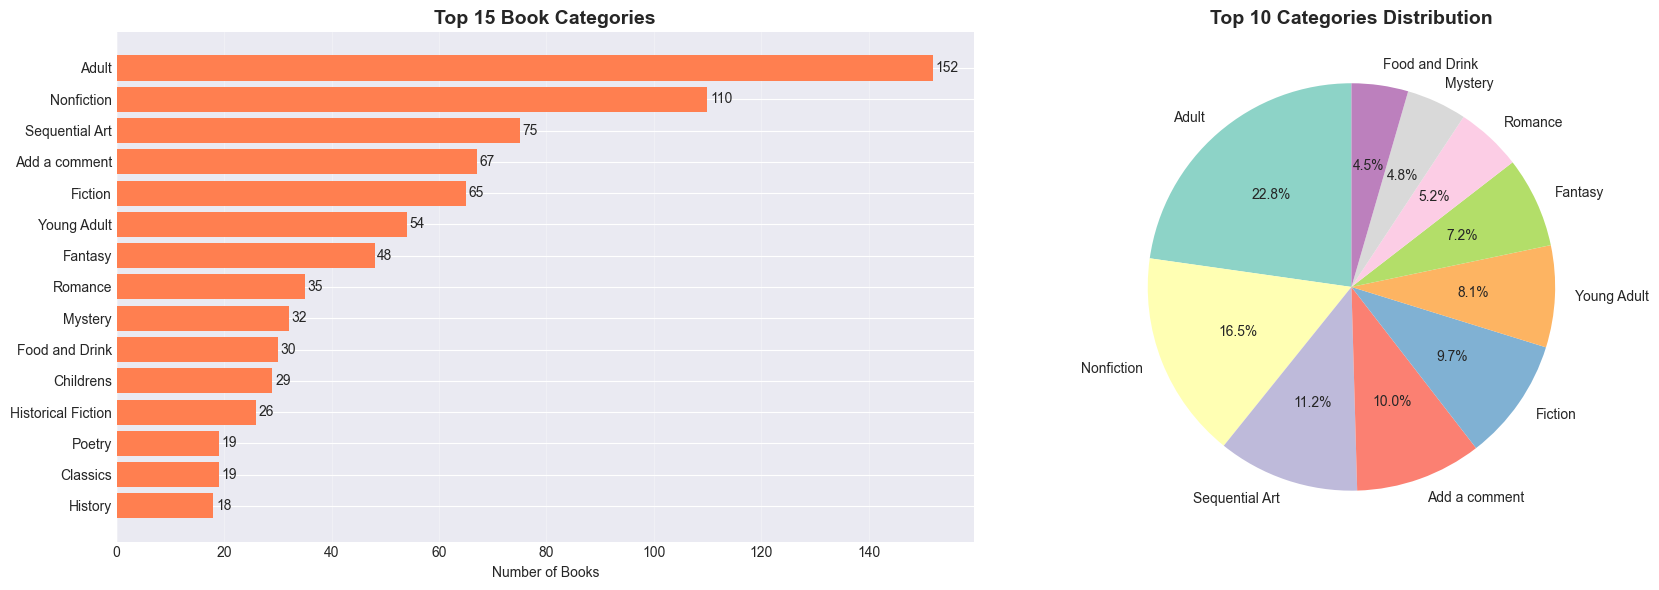


Total Categories: 50
Most Popular Category: Adult (152 books)


In [27]:
# Category distribution
category_counts = df['category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart for top 15 categories
top_categories = category_counts.head(15)
axes[0].barh(range(len(top_categories)), top_categories.values, color='coral')
axes[0].set_yticks(range(len(top_categories)))
axes[0].set_yticklabels(top_categories.index)
axes[0].set_xlabel('Number of Books')
axes[0].set_title('Top 15 Book Categories', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(top_categories.values):
    axes[0].text(v + 0.5, i, str(v), va='center')

# Pie chart for top 10 categories
top10_categories = category_counts.head(10)
colors = plt.cm.Set3(range(len(top10_categories)))
axes[1].pie(top10_categories.values, labels=top10_categories.index, autopct='%1.1f%%',
            startangle=90, colors=colors)
axes[1].set_title('Top 10 Categories Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal Categories: {df['category'].nunique()}")
print(f"Most Popular Category: {category_counts.index[0]} ({category_counts.values[0]} books)")


## 4. Rating Analysis


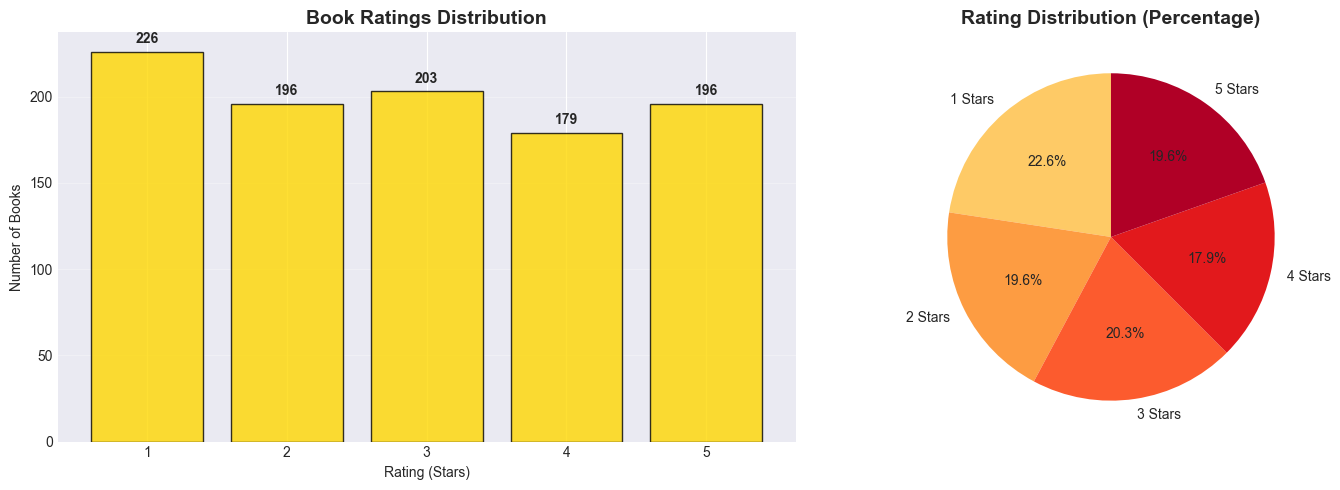


Rating Statistics:
  Mean Rating: 2.92 stars
  Median Rating: 3 stars
  Most Common Rating: 1 stars


In [28]:
# Rating distribution
rating_counts = df['rating'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
axes[0].bar(rating_counts.index, rating_counts.values, color='gold', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Rating (Stars)')
axes[0].set_ylabel('Number of Books')
axes[0].set_title('Book Ratings Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 6))
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(rating_counts.values):
    axes[0].text(rating_counts.index[i], v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(rating_counts.values, labels=[f'{int(r)} Stars' for r in rating_counts.index],
            autopct='%1.1f%%', startangle=90, colors=plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(rating_counts))))
axes[1].set_title('Rating Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nRating Statistics:")
print(f"  Mean Rating: {df['rating'].mean():.2f} stars")
print(f"  Median Rating: {df['rating'].median():.0f} stars")
print(f"  Most Common Rating: {df['rating'].mode()[0]:.0f} stars")


## 5. Price vs Rating Analysis


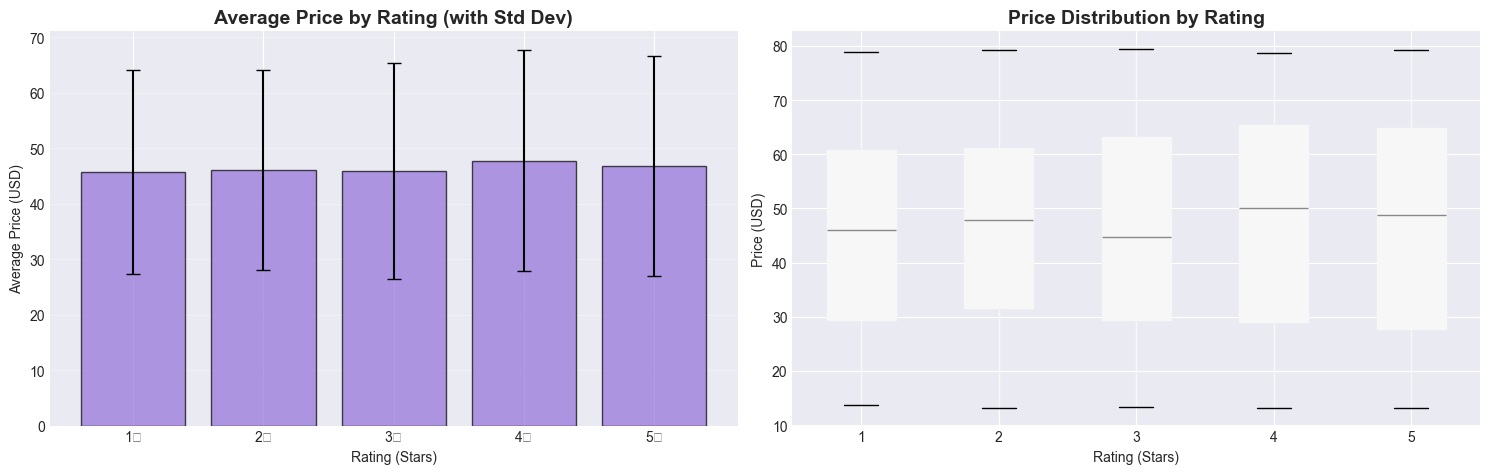


Average Price by Rating:
  1 Stars: $45.73 (226 books)
  2 Stars: $46.06 (196 books)
  3 Stars: $45.90 (203 books)
  4 Stars: $47.76 (179 books)
  5 Stars: $46.80 (196 books)


In [29]:
# Average price by rating
price_by_rating = df.groupby('rating')['price_usd'].agg(['mean', 'median', 'std'])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart with error bars
x_pos = range(len(price_by_rating))
axes[0].bar(x_pos, price_by_rating['mean'], yerr=price_by_rating['std'], 
            color='mediumpurple', alpha=0.7, capsize=5, edgecolor='black')
axes[0].set_xlabel('Rating (Stars)')
axes[0].set_ylabel('Average Price (USD)')
axes[0].set_title('Average Price by Rating (with Std Dev)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels([f'{int(r)}⭐' for r in price_by_rating.index])
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot
df.boxplot(column='price_usd', by='rating', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Rating (Stars)')
axes[1].set_ylabel('Price (USD)')
axes[1].set_title('Price Distribution by Rating', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

print("\nAverage Price by Rating:")
for rating in sorted(df['rating'].unique()):
    avg_price = df[df['rating'] == rating]['price_usd'].mean()
    count = len(df[df['rating'] == rating])
    print(f"  {int(rating)} Stars: ${avg_price:.2f} ({count} books)")


## 6. Price Category Analysis


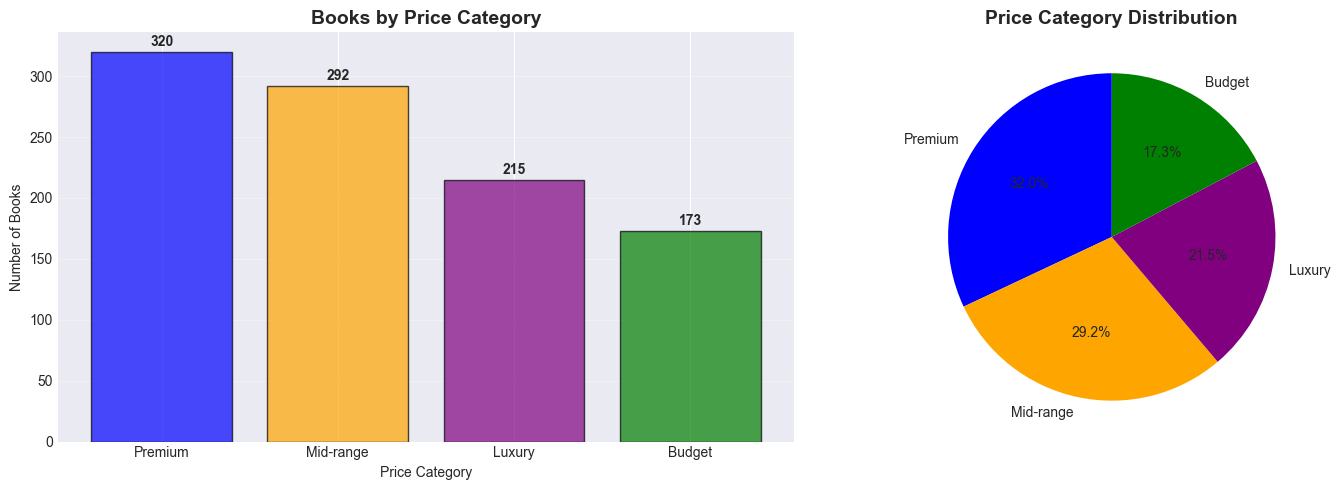

In [30]:
# Price category distribution
price_cat_counts = df['price_category_usd'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
colors_map = {'Budget': 'green', 'Mid-range': 'orange', 'Premium': 'blue', 'Luxury': 'purple'}
bar_colors = [colors_map.get(cat, 'gray') for cat in price_cat_counts.index]

axes[0].bar(price_cat_counts.index, price_cat_counts.values, color=bar_colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Price Category')
axes[0].set_ylabel('Number of Books')
axes[0].set_title('Books by Price Category', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(price_cat_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(price_cat_counts.values, labels=price_cat_counts.index, autopct='%1.1f%%',
            startangle=90, colors=[colors_map.get(cat, 'gray') for cat in price_cat_counts.index])
axes[1].set_title('Price Category Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Summary Statistics


In [ ]:
# Comprehensive summary
print("="*80)
print("BOOKSTORE ANALYTICS SUMMARY")
print("="*80)
print(f"\n📚 INVENTORY OVERVIEW:")
print(f"  Total Books: {len(df):,}")
print(f"  Total Categories: {df['category'].nunique()}")
print(f"  Total Stock Quantity: {df['stock_quantity'].sum():,}")
print(f"  Books In Stock: {df['in_stock'].sum():,} ({df['in_stock'].sum()/len(df)*100:.1f}%)")

print(f"\n💰 PRICING INSIGHTS:")
print(f"  Price Range: ${df['price_usd'].min():.2f} - ${df['price_usd'].max():.2f}")
print(f"  Average Price: ${df['price_usd'].mean():.2f}")
print(f"  Median Price: ${df['price_usd'].median():.2f}")
print(f"  Total Inventory Value: ${(df['price_usd'] * df['stock_quantity']).sum():,.2f}")

print(f"\n⭐ RATING INSIGHTS:")
print(f"  Average Rating: {df['rating'].mean():.2f} stars")
print(f"  Median Rating: {df['rating'].median():.0f} stars")
print(f"  Most Common Rating: {df['rating'].mode()[0]:.0f} stars")
print(f"  5-Star Books: {len(df[df['rating'] == 5])} ({len(df[df['rating'] == 5])/len(df)*100:.1f}%)")

print(f"\n📊 CATEGORY INSIGHTS:")
top_cat = df['category'].value_counts().index[0]
top_cat_count = df['category'].value_counts().values[0]
print(f"  Most Popular Category: {top_cat} ({top_cat_count} books)")
print(f"  Most Expensive Category: {df.groupby('category')['price_usd'].mean().idxmax()}")
print(f"  Highest Rated Category: {df.groupby('category')['rating'].mean().idxmax()}")

print(f"\n💎 PRICE CATEGORIES:")
for cat in ['Budget', 'Mid-range', 'Premium', 'Luxury']:
    if cat in df['price_category_usd'].values:
        count = len(df[df['price_category_usd'] == cat])
        pct = count / len(df) * 100
        print(f"  {cat}: {count} books ({pct:.1f}%)")

print("\n" + "="*80)


BOOKSTORE ANALYTICS SUMMARY

📚 INVENTORY OVERVIEW:
  Total Books: 1,000
  Total Categories: 50
  Total Stock Quantity: 8,585
  Books In Stock: 1,000 (100.0%)

💰 PRICING INSIGHTS:
  Price Range: $13.23 - $79.37
  Average Price: $46.40
  Median Price: $47.61
  Total Inventory Value: $397,187.13

⭐ RATING INSIGHTS:
  Average Rating: 2.92 stars
  Median Rating: 3 stars
  Most Common Rating: 1 stars
  5-Star Books: 196 (19.6%)

📊 CATEGORY INSIGHTS:
  Most Popular Category: Adult (152 books)
  Most Expensive Category: Suspense
  Highest Rated Category: Adult Fiction

💎 PRICE CATEGORIES:
  Budget: 173 books (17.3%)
  Mid-range: 292 books (29.2%)
  Premium: 320 books (32.0%)
  Luxury: 215 books (21.5%)

